Corner Detection, which is a subset of Interest Point Detection, tries to detect
points in the image which have a well-defined position and can be robustly detected
in multiple images of the same scene. Very often, these points lie along the corners
or edges of objects in the image - hence the name.

Corner detection is useful in several computer vision tasks - such as Image Registration,
Motion Detection and Panaroma Stitching. This is because if the locations of the same
points are known in two different images, it gives a reference to align those images. Corners,
with their well-defined positions serve as good candidates for such points.

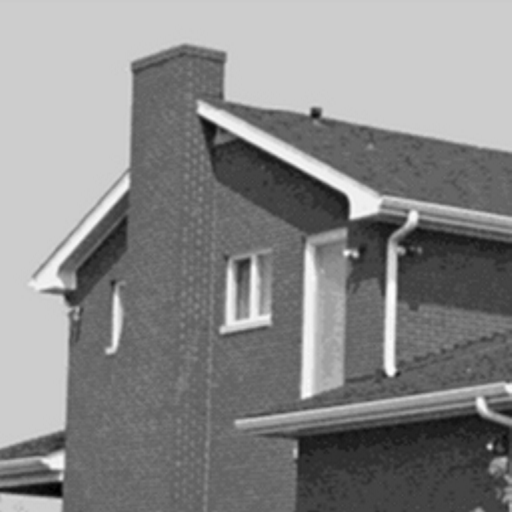

In [1]:
using Images, TestImages
img = Gray.(testimage("house"))

We use this image of a house, with numerous edges and corners.

The `imcorner` function can be used to detect corners in the image - and it returns an
array of booleans, where a `true` value denotes that the corresponding pixel may be a
corner. We use this to mark those pixels in red on a copy of the image.

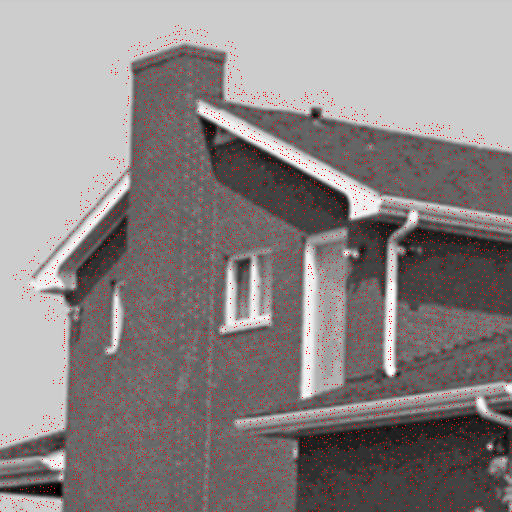

In [2]:
corners = imcorner(img)
img_copy = RGB.(img)
img_copy[corners] .= RGB(1.0, 0.0, 0.0)
img_copy

As you can see, several points which lie in the interior of the object (the house)
have also been detected as corners. We can fix this by specifying a higher threshold percentile.

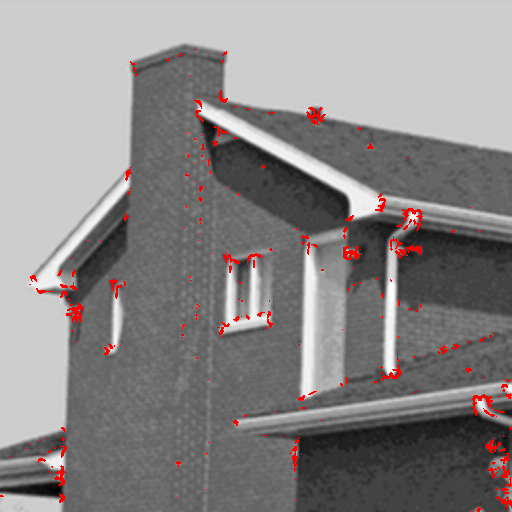

In [3]:
corners = imcorner(img, Percentile(98.5))
img_copy2 = RGB.(img)
img_copy2[corners] .= RGB(1.0, 0.0, 0.0)
img_copy2

This seems much better. A detailed documentation of the function parameters can be found in
the documentation of `imcorner`.

Internally, `imcorner` uses one of three algorithms: *Harris*, *Shi Tomasi* or
*Kitchen Rosenfield* to detect corners. Which one to use can be specified using
the `method` parameter to `imcorner`. Each algorithm also has a separate method.

┌ Warning: Assignment to `corners` in soft scope is ambiguous because a global variable by the same name exists: `corners` will be treated as a new local. Disambiguate by using `local corners` to suppress this warning or `global corners` to assign to the existing global variable.
└ @ nothing string:4


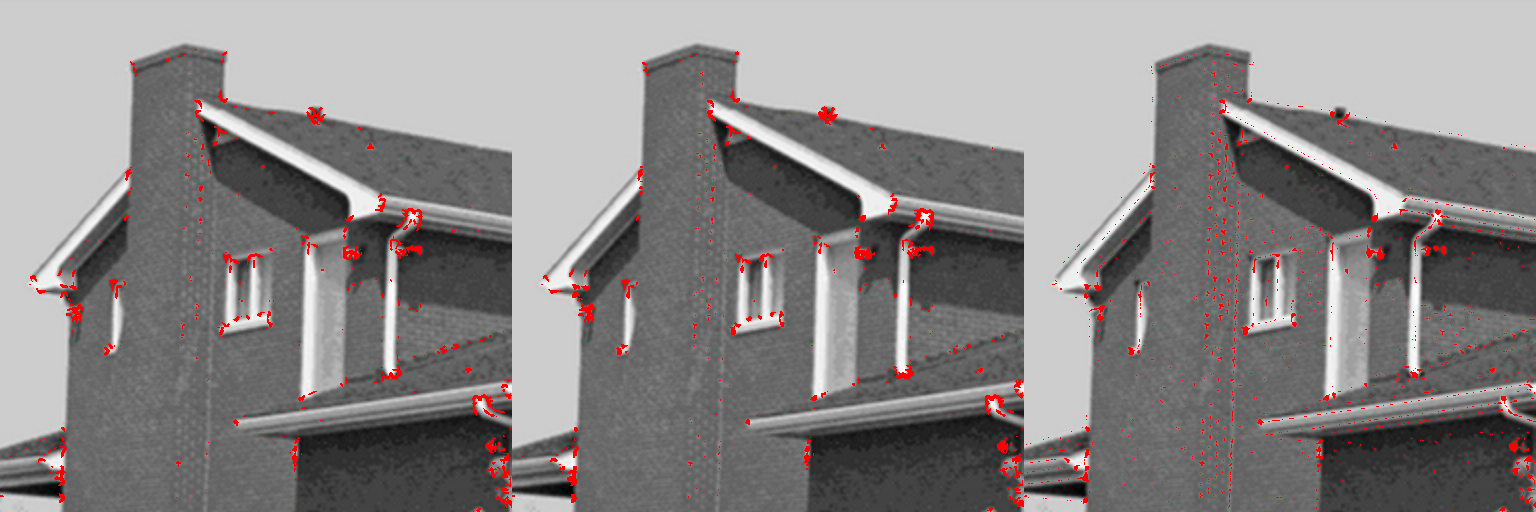

In [4]:
detection_methods = [harris, shi_tomasi, kitchen_rosenfeld]
img_copies = [RGB.(img) for i in 1:length(detection_methods)]
for i in 1:length(detection_methods)
    corners = imcorner(img, Percentile(98.5); method=detection_methods[i])
    img_copies[i] = RGB.(img)
    img_copies[i][corners] .= RGB(1.0, 0.0, 0.0)
end
mosaicview(img_copies; nrow=1)

These algorithms use the gradient of the image to identify corners, because intensities
change abruptly at corner points, giving rise to large gradients. However, this makes them
computationally expensive.

The *FAST (Features from Accelarated Segment Test) Corner Detector* is a feature
detection algorithm which is designed to be computationally cheaper, and hence much faster.
It classifies a pixel $P$ as a corner if at least $n$ contiguous points out of the 16
points in a circle around it have intensities either higher (or lower) than that of $P$
by a certain threshold $t$.

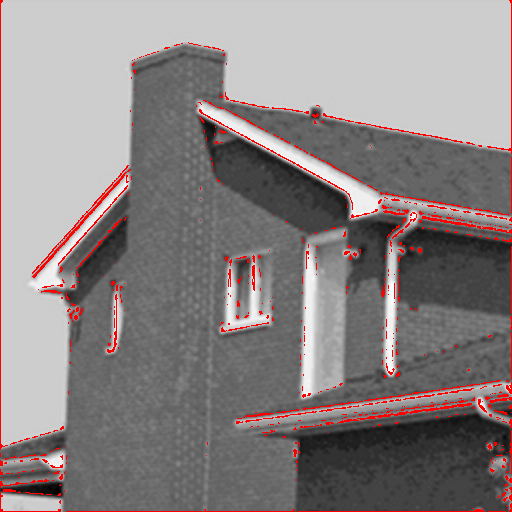

In [5]:
corners = fastcorners(img, 11, 0.1) # fastcorners(img, n, t) where n and t are optional
img_copy3 = RGB.(img)
img_copy3[corners] .= RGB(1.0, 0.0, 0.0)
img_copy3

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*